In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data

### Subtask:
Muat data dari file CSV ke dalam DataFrame pandas.


In [89]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Test_dataset/Artikel FTMM - Sheet1 (1).csv')
display(df.head())

title  \
0  Desa Binaan 2.0 Wujud Nyata Pengabdian Mahasis...   
1  Forum Group Discussion SEGTA 2025 Bahas Commun...   
2  Solar Harvest: Pengering Panen Cerdas Berbasis...   
3  BEM FTMM x ARGON Kembangkan Pupuk Limbah Sisik...   
4  Pemasangan SmartAqua oleh RASENA UNAIR Dorong ...   

                                         description  
0  FTMM NEWS – Badan Eksekutif Mahasiswa Fakultas...  
1  FTMM NEWS – Sesudah kegiatan orientasi pada Se...  
2  FTMM NEWS – Tim Inovasi Ikatan Mahasiswa Elekt...  
3  FTMM NEWS –  BEM FTMM Universitas Airlangga me...  
4  FTMM NEWS –Tim RASENA Universitas Airlangga ke...

## Text cleaning

### Subtask:
Lakukan pembersihan teks menggunakan Regular Expression untuk menghapus HTML tag, angka, simbol, atau tautan.


In [90]:
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs or links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove symbols or special characters (keeping spaces)
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove leading/trailing whitespace
    text = text.strip()
    return text

# Potong 11 karakter awal dulu
df['description_trimmed'] = df['description'].str[11:]

# Baru lakukan cleaning
df['cleaned_title'] = df['title'].apply(clean_text)
df['cleaned_description'] = df['description_trimmed'].apply(clean_text)

display(df.head())


title  \
0  Desa Binaan 2.0 Wujud Nyata Pengabdian Mahasis...   
1  Forum Group Discussion SEGTA 2025 Bahas Commun...   
2  Solar Harvest: Pengering Panen Cerdas Berbasis...   
3  BEM FTMM x ARGON Kembangkan Pupuk Limbah Sisik...   
4  Pemasangan SmartAqua oleh RASENA UNAIR Dorong ...   

                                         description  \
0  FTMM NEWS – Badan Eksekutif Mahasiswa Fakultas...   
1  FTMM NEWS – Sesudah kegiatan orientasi pada Se...   
2  FTMM NEWS – Tim Inovasi Ikatan Mahasiswa Elekt...   
3  FTMM NEWS –  BEM FTMM Universitas Airlangga me...   
4  FTMM NEWS –Tim RASENA Universitas Airlangga ke...   

                                 description_trimmed  \
0   Badan Eksekutif Mahasiswa Fakultas Teknologi ...   
1   Sesudah kegiatan orientasi pada Senin (14/07)...   
2   Tim Inovasi Ikatan Mahasiswa Elektro (IME) Un...   
3    BEM FTMM Universitas Airlangga melalui Kemen...   
4  Tim RASENA Universitas Airlangga kembali melak...   

                                       cleaned_title  \
0  desa binaan  wujud nyata pengabdian mahasiswa ...   
1  forum group discussion segta  bahas community ...   
2  solar harvest pengering panen cerdas berbasis ...   
3  bem ftmm x argon kembangkan pupuk limbah sisik...   
4  pemasangan smartaqua oleh rasena unair dorong ...   

                                 cleaned_description  
0  badan eksekutif mahasiswa fakultas teknologi m...  
1  sesudah kegiatan orientasi pada senin  lalu pe...  
2  tim inovasi ikatan mahasiswa elektro ime unive...  
3  bem ftmm universitas airlangga melalui kemente...  
4  tim rasena universitas airlangga kembali melak...

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                30 non-null     object
 1   description          30 non-null     object
 2   description_trimmed  30 non-null     object
 3   cleaned_title        30 non-null     object
 4   cleaned_description  30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


## Text preprocessing

### Subtask:
Lakukan tokenisasi kata, stopword removal, dan stemming/lemmatization.


In [92]:
!pip install sastrawi

In [93]:
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Download resource NLTK untuk tokenizer
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Buat stemmer dari Sastrawi
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Buat stopword remover dari Sastrawi
stop_factory = StopWordRemoverFactory()
stopword_list = stop_factory.get_stop_words()

def tokenize_text(text):
    if text is None:
        return []
    return word_tokenize(text)

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stopword_list]

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Terapkan preprocessing
df['processed_description'] = (
    df['cleaned_description']
      .apply(tokenize_text)
      .apply(remove_stopwords)
      .apply(stem_tokens)
)

display(df.head())


title  \
0  Desa Binaan 2.0 Wujud Nyata Pengabdian Mahasis...   
1  Forum Group Discussion SEGTA 2025 Bahas Commun...   
2  Solar Harvest: Pengering Panen Cerdas Berbasis...   
3  BEM FTMM x ARGON Kembangkan Pupuk Limbah Sisik...   
4  Pemasangan SmartAqua oleh RASENA UNAIR Dorong ...   

                                         description  \
0  FTMM NEWS – Badan Eksekutif Mahasiswa Fakultas...   
1  FTMM NEWS – Sesudah kegiatan orientasi pada Se...   
2  FTMM NEWS – Tim Inovasi Ikatan Mahasiswa Elekt...   
3  FTMM NEWS –  BEM FTMM Universitas Airlangga me...   
4  FTMM NEWS –Tim RASENA Universitas Airlangga ke...   

                                 description_trimmed  \
0   Badan Eksekutif Mahasiswa Fakultas Teknologi ...   
1   Sesudah kegiatan orientasi pada Senin (14/07)...   
2   Tim Inovasi Ikatan Mahasiswa Elektro (IME) Un...   
3    BEM FTMM Universitas Airlangga melalui Kemen...   
4  Tim RASENA Universitas Airlangga kembali melak...   

                                       cleaned_title  \
0  desa binaan  wujud nyata pengabdian mahasiswa ...   
1  forum group discussion segta  bahas community ...   
2  solar harvest pengering panen cerdas berbasis ...   
3  bem ftmm x argon kembangkan pupuk limbah sisik...   
4  pemasangan smartaqua oleh rasena unair dorong ...   

                                 cleaned_description  \
0  badan eksekutif mahasiswa fakultas teknologi m...   
1  sesudah kegiatan orientasi pada senin  lalu pe...   
2  tim inovasi ikatan mahasiswa elektro ime unive...   
3  bem ftmm universitas airlangga melalui kemente...   
4  tim rasena universitas airlangga kembali melak...   

                               processed_description  
0  [badan, eksekutif, mahasiswa, fakultas, teknol...  
1  [giat, orientasi, senin, lalu, serta, sustaina...  
2  [tim, inovasi, ikat, mahasiswa, elektro, ime, ...  
3  [bem, ftmm, universitas, airlangga, lalu, ment...  
4  [tim, rasena, universitas, airlangga, laksana,...

## Vector representation

### Subtask:
Buat representasi vektor dokumen menggunakan TF, IDF, dan TF-IDF.


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the list of tokens back into strings for TfidfVectorizer
df['processed_description_str'] = df['processed_description'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else '')

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_description_str'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# Get the list of feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Number of features (words):", len(feature_names))
# Optionally print some feature names
# print("Feature names (first 20):", feature_names[:20])

Shape of TF-IDF matrix: (30, 1563)
Number of features (words): 1563


## Visualize important words

### Subtask:
Visualisasikan 10 kata paling penting (TF-IDF tertinggi) dari setiap artikel.


In [95]:
import pandas as pd

# Get the feature names (words) from the tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame from the tfidf_matrix
# The matrix is sparse, convert to dense array for DataFrame creation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df.index)

# For each row (article) in the TF-IDF DataFrame:
print("Top 10 TF-IDF words for each article:")
for index, row in tfidf_df.iterrows():
    # Sort the TF-IDF values in descending order and select top 10
    top_words = row.sort_values(ascending=False).head(10)

    # Print the article index and the top 10 words with their scores
    print(f"\nArticle {index}:")
    for word, score in top_words.items():
        print(f"  {word}: {score:.4f}")

Top 10 TF-IDF words for each article:

Article 0:
  bina: 0.3344
  volunteer: 0.2932
  desa: 0.2662
  program: 0.1894
  minggu: 0.1759
  goal: 0.1759
  bem: 0.1657
  dusun: 0.1560
  laksana: 0.1465
  karangploso: 0.1433

Article 1:
  topik: 0.2662
  gili: 0.2350
  segta: 0.2095
  iyang: 0.1763
  to: 0.1763
  and: 0.1674
  green: 0.1571
  in: 0.1571
  sustainable: 0.1405
  quality: 0.1405

Article 2:
  harvest: 0.3047
  ime: 0.2717
  ering: 0.2483
  panen: 0.2397
  solar: 0.2301
  alat: 0.2170
  tani: 0.1736
  kepuh: 0.1524
  wangkal: 0.1524
  modern: 0.1524

Article 3:
  pupuk: 0.4185
  tani: 0.2763
  agro: 0.2471
  nanoshield: 0.2471
  sisik: 0.1853
  kimia: 0.1853
  tanah: 0.1843
  subur: 0.1569
  poin: 0.1508
  waktu: 0.1386

Article 4:
  tambak: 0.3860
  smartaqua: 0.3169
  alat: 0.3037
  rasena: 0.2413
  anyar: 0.2236
  gunung: 0.2236
  pakan: 0.2112
  pantau: 0.1789
  tim: 0.1366
  warga: 0.1290

Article 5:
  sqym: 0.4051
  tani: 0.3863
  tanah: 0.2405
  lahan: 0.2389
  data: 0.2

Top 10 TF-IDF words for each article:

Article 0:
  bina: 0.3344
  volunteer: 0.2932
  desa: 0.2662
  program: 0.1894
  minggu: 0.1759
  goal: 0.1759
  bem: 0.1657
  dusun: 0.1560
  laksana: 0.1465
  karangploso: 0.1433


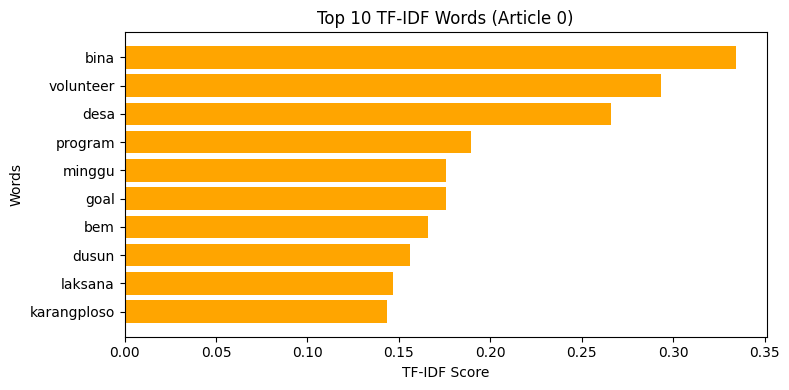


Article 1:
  topik: 0.2662
  gili: 0.2350
  segta: 0.2095
  iyang: 0.1763
  to: 0.1763
  and: 0.1674
  green: 0.1571
  in: 0.1571
  sustainable: 0.1405
  quality: 0.1405


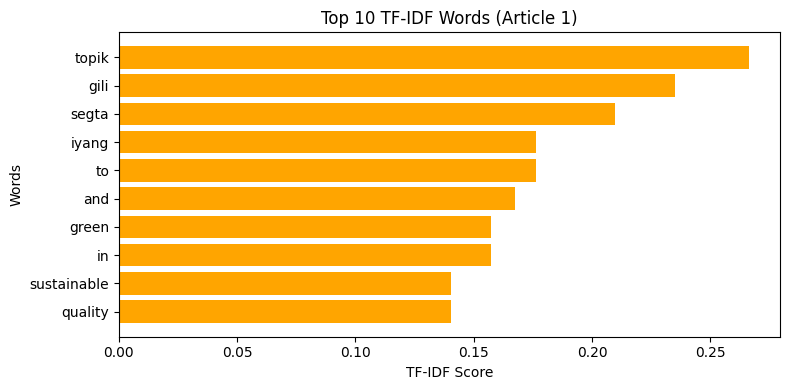


Article 2:
  harvest: 0.3047
  ime: 0.2717
  ering: 0.2483
  panen: 0.2397
  solar: 0.2301
  alat: 0.2170
  tani: 0.1736
  kepuh: 0.1524
  wangkal: 0.1524
  modern: 0.1524


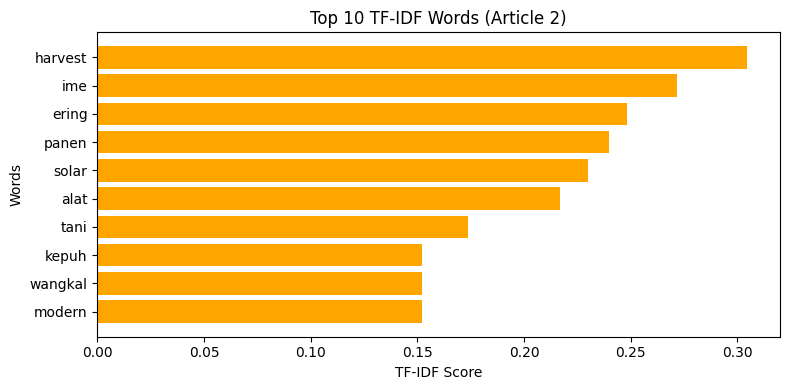


Article 3:
  pupuk: 0.4185
  tani: 0.2763
  agro: 0.2471
  nanoshield: 0.2471
  sisik: 0.1853
  kimia: 0.1853
  tanah: 0.1843
  subur: 0.1569
  poin: 0.1508
  waktu: 0.1386


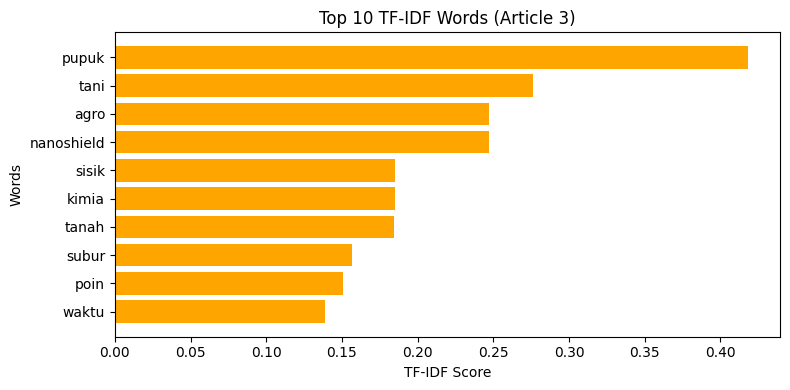


Article 4:
  tambak: 0.3860
  smartaqua: 0.3169
  alat: 0.3037
  rasena: 0.2413
  anyar: 0.2236
  gunung: 0.2236
  pakan: 0.2112
  pantau: 0.1789
  tim: 0.1366
  warga: 0.1290


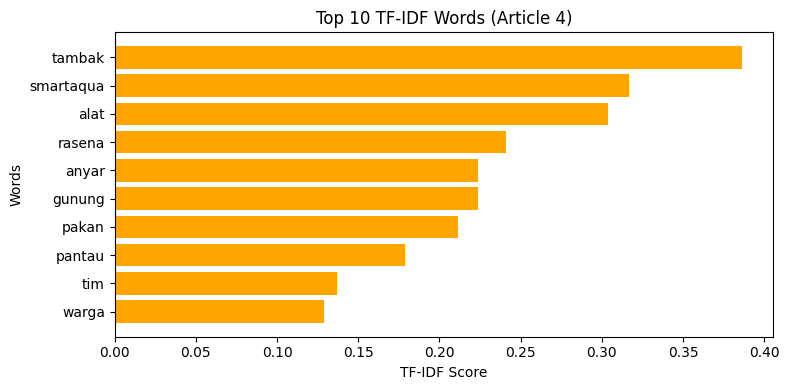


Article 5:
  sqym: 0.4051
  tani: 0.3863
  tanah: 0.2405
  lahan: 0.2389
  data: 0.2048
  imercy: 0.1706
  network: 0.1612
  neural: 0.1612
  algoritma: 0.1612
  artificial: 0.1612


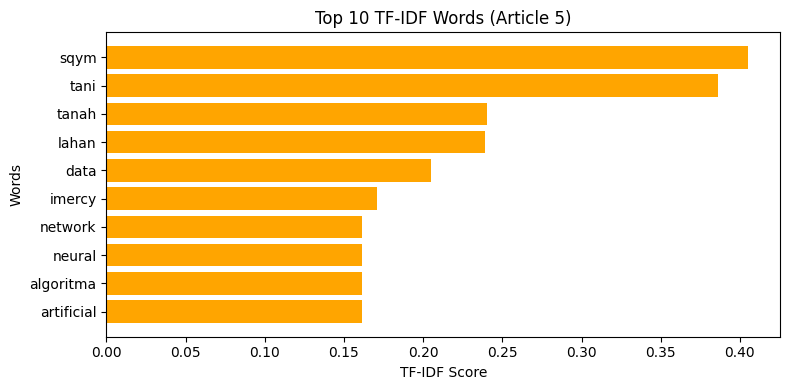


Article 6:
  tambak: 0.3799
  energi: 0.3626
  smartaqua: 0.3564
  alat: 0.1898
  pakan: 0.1782
  rasena: 0.1628
  operasi: 0.1628
  ikan: 0.1258
  tim: 0.1229
  jadwal: 0.1188


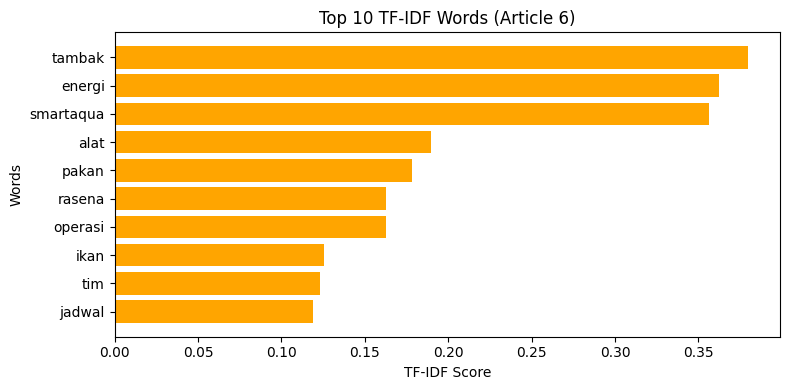


Article 7:
  hama: 0.3823
  tani: 0.3342
  desa: 0.2420
  plaosan: 0.2215
  pestisida: 0.1569
  rusak: 0.1434
  masalah: 0.1403
  guna: 0.1401
  program: 0.1353
  potensi: 0.1243


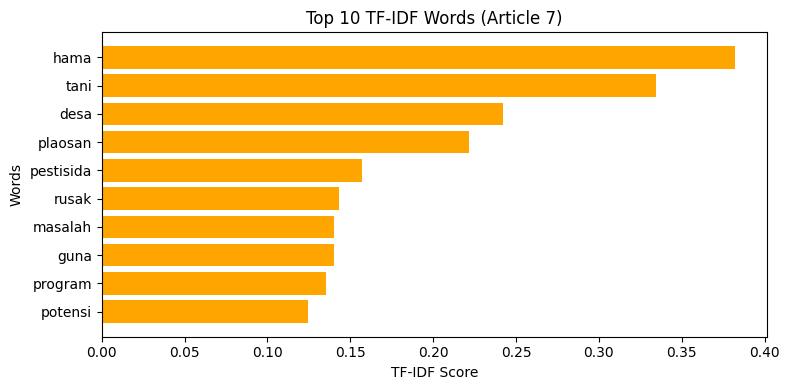


Article 8:
  nanoshield: 0.3164
  agro: 0.3164
  hama: 0.2891
  tani: 0.2426
  nanokitosan: 0.2313
  kimia: 0.1898
  pupuk: 0.1608
  potensi: 0.1504
  untung: 0.1419
  ancam: 0.1266


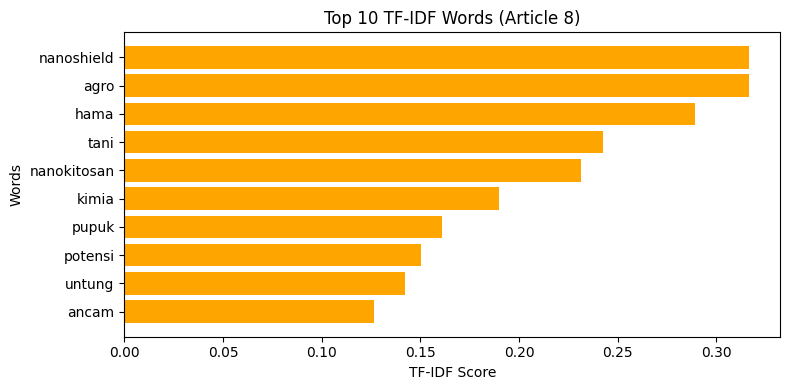


Article 9:
  kampung: 0.4291
  bakat: 0.4291
  budaya: 0.2807
  nabdidaya: 0.2807
  sampah: 0.2134
  lingkung: 0.1850
  akuaponik: 0.1604
  hijau: 0.1604
  bank: 0.1604
  masyarakat: 0.1387


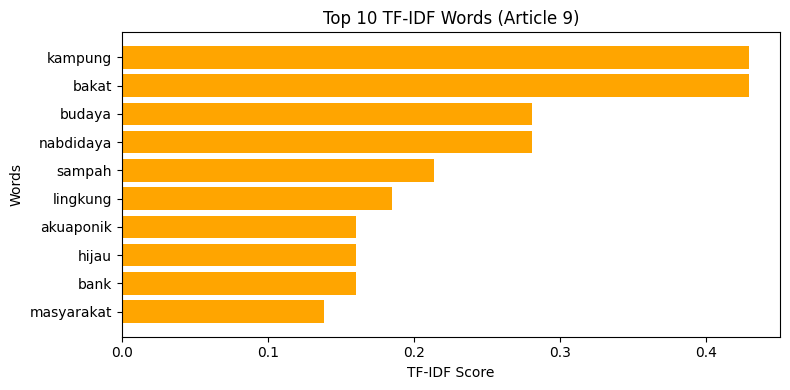


Article 10:
  imercy: 0.5459
  hutan: 0.2259
  sqym: 0.2209
  proyek: 0.1807
  cfp: 0.1807
  versi: 0.1612
  dana: 0.1365
  kompetisi: 0.1356
  aismo: 0.1356
  tani: 0.1287


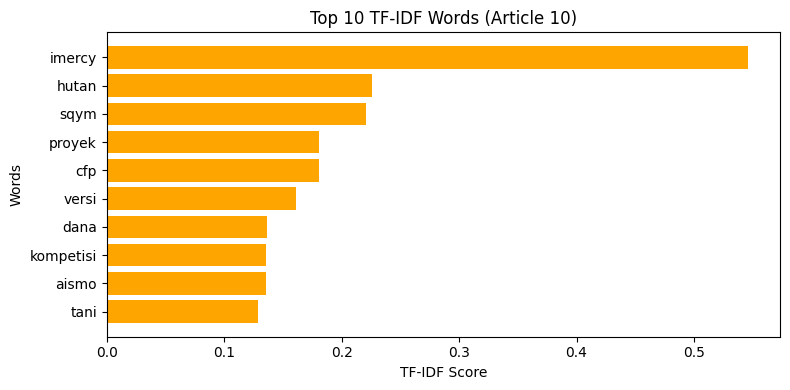


Article 11:
  limbah: 0.3699
  biochar: 0.3539
  siwalan: 0.2528
  kulit: 0.2528
  kelola: 0.2143
  responsible: 0.1803
  production: 0.1803
  consumption: 0.1803
  lingkung: 0.1400
  lanjut: 0.1361


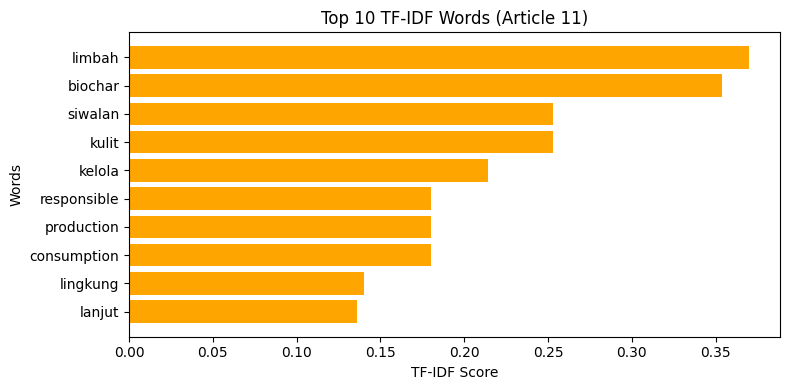


Article 12:
  imercy: 0.4823
  sqym: 0.2891
  video: 0.2839
  pamer: 0.2129
  short: 0.2129
  movies: 0.2129
  festival: 0.1898
  juara: 0.1419
  booth: 0.1419
  lolos: 0.1419


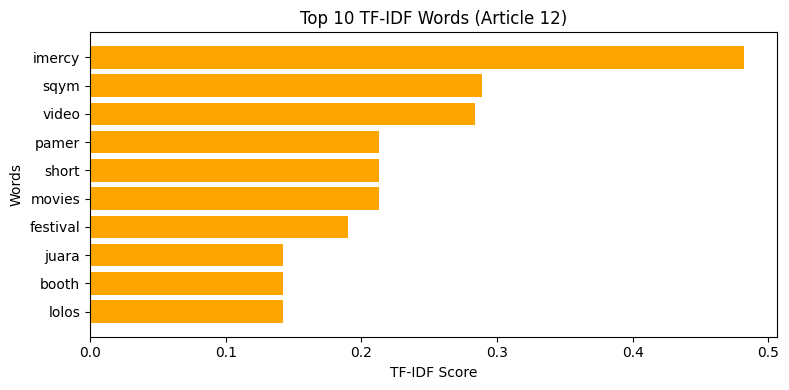


Article 13:
  isi: 0.3314
  evcs: 0.3292
  bangga: 0.2682
  kendara: 0.2194
  wijaya: 0.2194
  smk: 0.2194
  rc: 0.2194
  nree: 0.2194
  daya: 0.1715
  putra: 0.1657


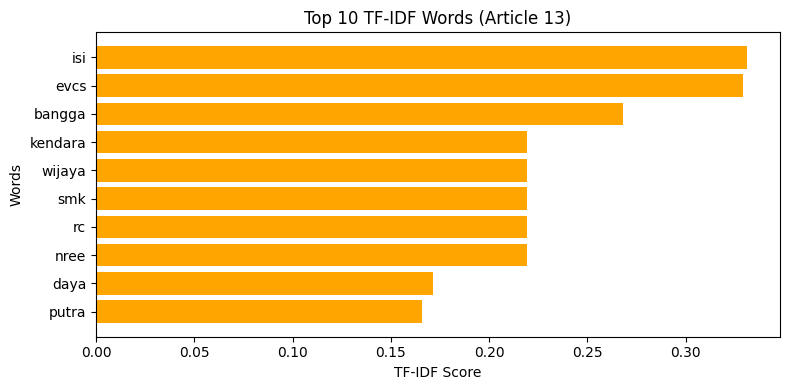


Article 14:
  workshop: 0.3172
  tulis: 0.2538
  web: 0.2538
  materi: 0.2532
  apa: 0.1903
  artikel: 0.1903
  buat: 0.1900
  website: 0.1697
  branding: 0.1697
  atur: 0.1551


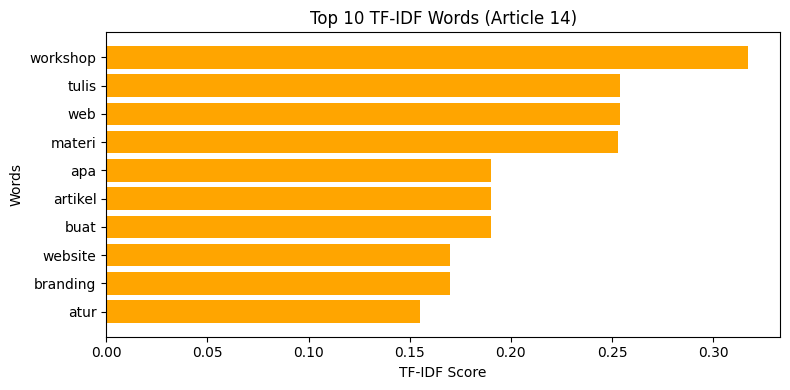


Article 15:
  nanosensor: 0.4864
  bbpom: 0.4256
  nanoteknologi: 0.2972
  surabaya: 0.2079
  rekayasa: 0.1982
  obat: 0.1824
  makan: 0.1824
  deteksi: 0.1626
  prodi: 0.1454
  kembang: 0.0875


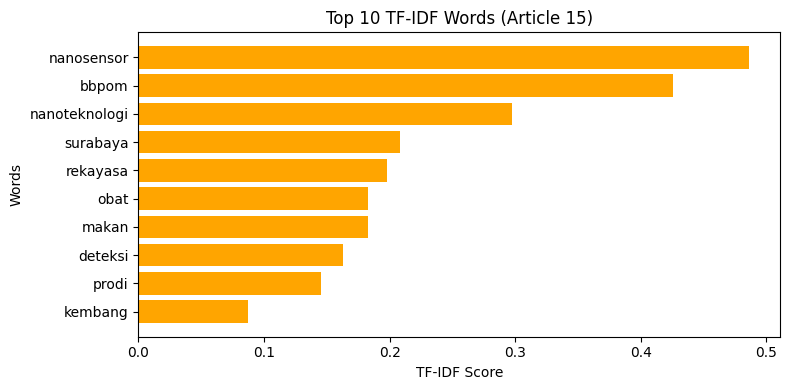


Article 16:
  lampu: 0.3022
  biru: 0.2421
  terang: 0.2367
  si: 0.2159
  telaga: 0.1937
  sebut: 0.1799
  acdh: 0.1727
  ftmm: 0.1676
  aktivitas: 0.1578
  unit: 0.1453


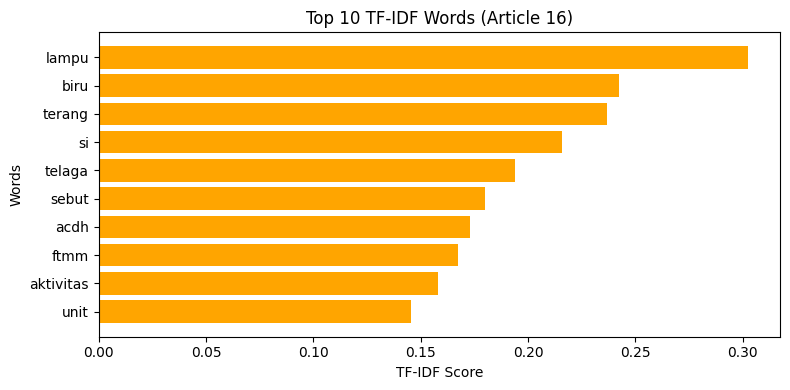


Article 17:
  hidroponik: 0.4594
  bina: 0.3148
  nutrisi: 0.2576
  desa: 0.2126
  karangploso: 0.2099
  kembang: 0.1854
  cair: 0.1723
  dusun: 0.1713
  tanam: 0.1622
  nanokitosan: 0.1574


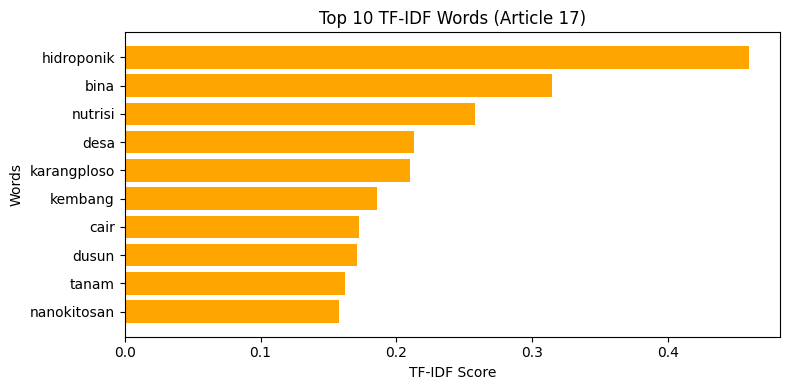


Article 18:
  ti: 0.4920
  mesin: 0.3280
  printing: 0.2733
  mas: 0.2380
  gunawan: 0.2186
  sma: 0.1640
  prodi: 0.1634
  teknik: 0.1557
  kenal: 0.1376
  industri: 0.1246


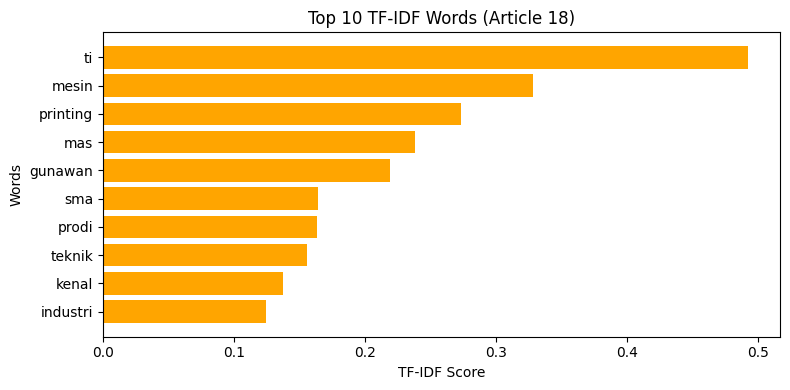


Article 19:
  listrik: 0.2861
  bagaimana: 0.2339
  energi: 0.2083
  tunjang: 0.1914
  kontak: 0.1914
  materi: 0.1909
  tanya: 0.1706
  asal: 0.1273
  hidup: 0.1273
  beberapa: 0.1205


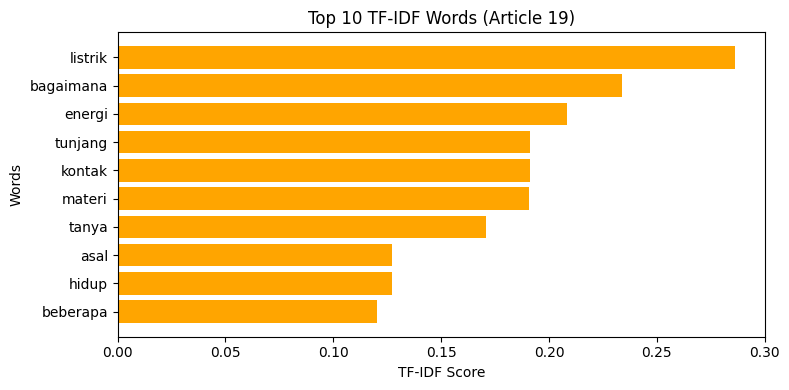


Article 20:
  pariwisata: 0.3711
  potensi: 0.2413
  elektro: 0.2413
  ngiroboyo: 0.2277
  pantai: 0.2149
  pokdarwis: 0.2030
  sedang: 0.2030
  teknik: 0.1946
  unair: 0.1587
  mahasiswa: 0.1517


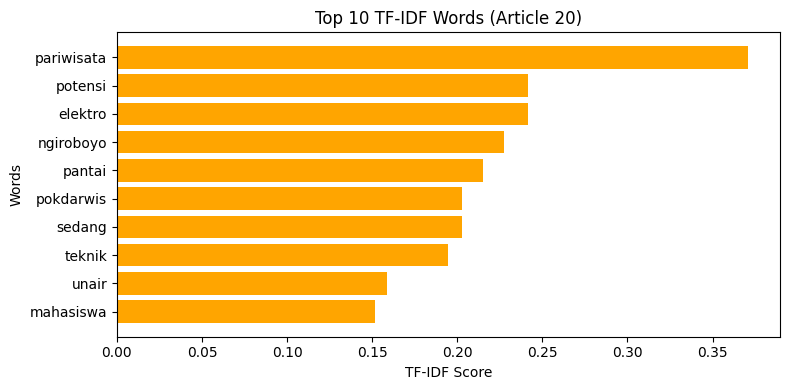


Article 21:
  laut: 0.3327
  pantai: 0.3015
  duduk: 0.2967
  bumi: 0.2662
  hidup: 0.2213
  kenjeran: 0.1996
  bersih: 0.1916
  giat: 0.1848
  sangat: 0.1597
  lingkung: 0.1535


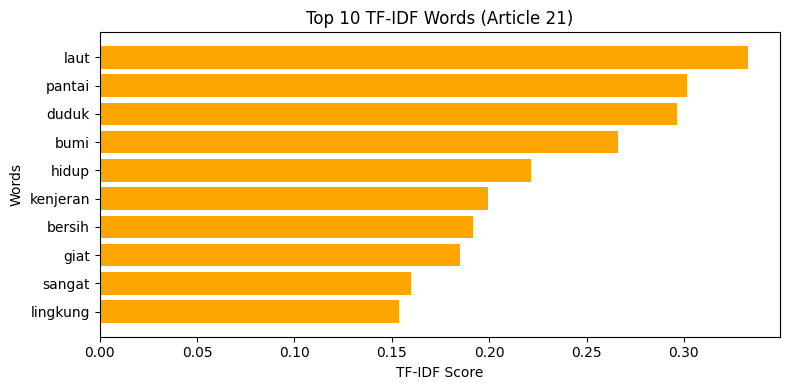


Article 22:
  zero: 0.3796
  waste: 0.3037
  limbah: 0.3030
  olah: 0.2681
  aliyah: 0.2278
  gera: 0.2278
  masyarakat: 0.1909
  daerah: 0.1609
  abdi: 0.1529
  dukuh: 0.1518


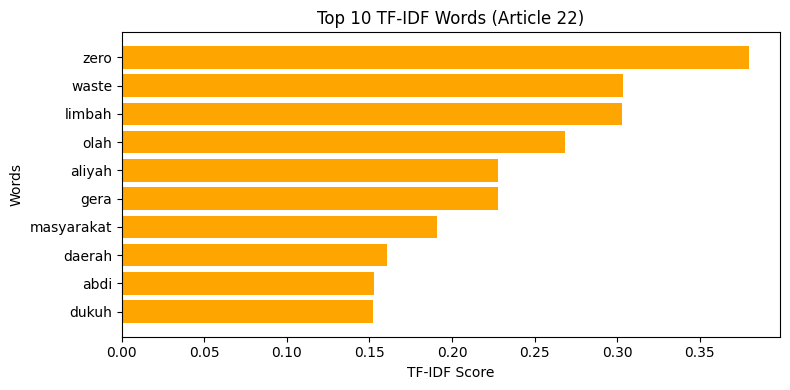


Article 23:
  didik: 0.3023
  umkm: 0.1993
  kualitas: 0.1924
  education: 0.1727
  salah: 0.1539
  masyarakat: 0.1538
  relevan: 0.1494
  quality: 0.1462
  ubah: 0.1385
  utama: 0.1331


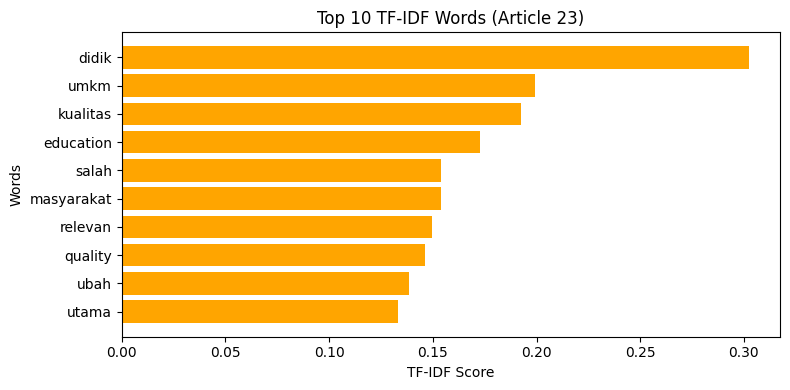


Article 24:
  anakanak: 0.3533
  efl: 0.2944
  tpa: 0.2355
  anak: 0.2355
  astra: 0.2355
  rokok: 0.2355
  kampung: 0.2100
  giat: 0.1839
  temu: 0.1439
  mahasiswa: 0.1307


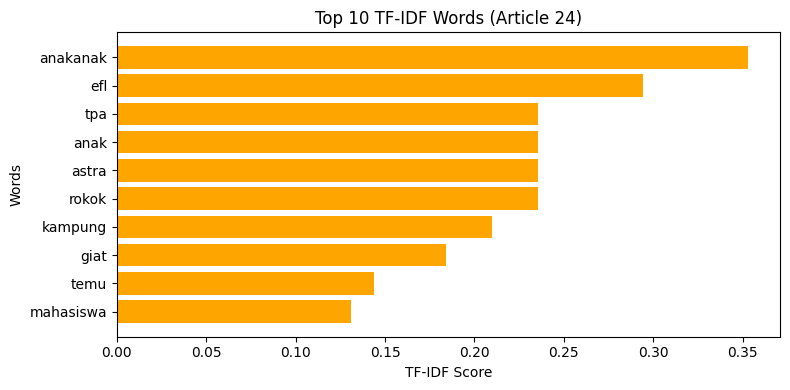


Article 25:
  sendang: 0.3352
  ngiriboyo: 0.2681
  fgd: 0.2391
  pacitan: 0.2185
  pantai: 0.2025
  listrik: 0.2004
  wisata: 0.1894
  kwh: 0.1341
  makmur: 0.1341
  misal: 0.1341


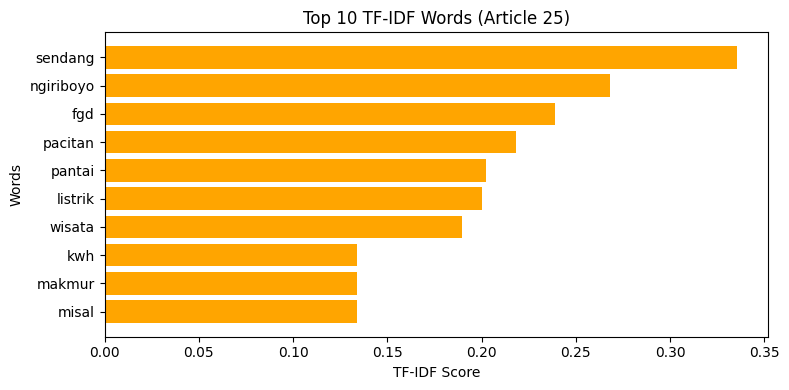


Article 26:
  pacitan: 0.4190
  bina: 0.2394
  ppdb: 0.2204
  renewable: 0.1664
  fakultas: 0.1600
  aji: 0.1469
  merdeka: 0.1469
  parisiwata: 0.1469
  indrata: 0.1469
  geotermal: 0.1469


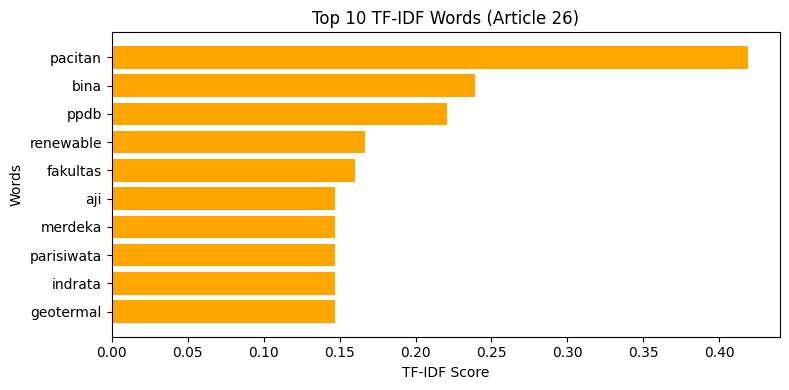


Article 27:
  bakau: 0.4157
  pohon: 0.3464
  fst: 0.2078
  masyarakat: 0.1524
  acara: 0.1508
  energi: 0.1508
  serta: 0.1508
  giat: 0.1443
  sel: 0.1386
  joint: 0.1386


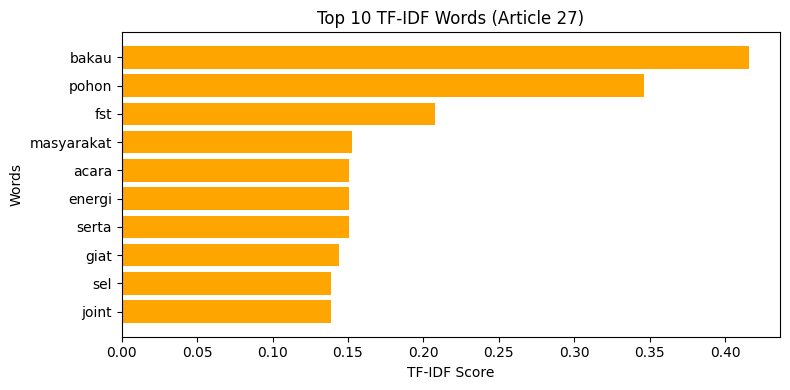


Article 28:
  udang: 0.2844
  prof: 0.1892
  retna: 0.1892
  energi: 0.1858
  ering: 0.1854
  inace: 0.1707
  si: 0.1522
  bintan: 0.1522
  apsari: 0.1513
  ikan: 0.1432


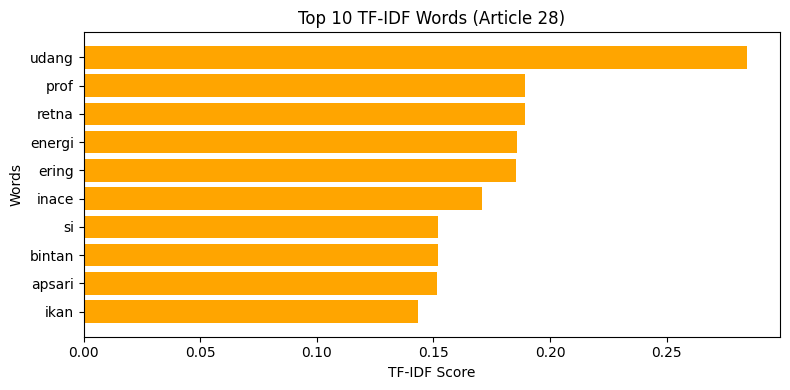


Article 29:
  johor: 0.4527
  bahru: 0.4527
  sijb: 0.1811
  malaysia: 0.1811
  indonesia: 0.1807
  sekolah: 0.1599
  wakil: 0.1548
  unair: 0.1442
  kjri: 0.1358
  sd: 0.1358


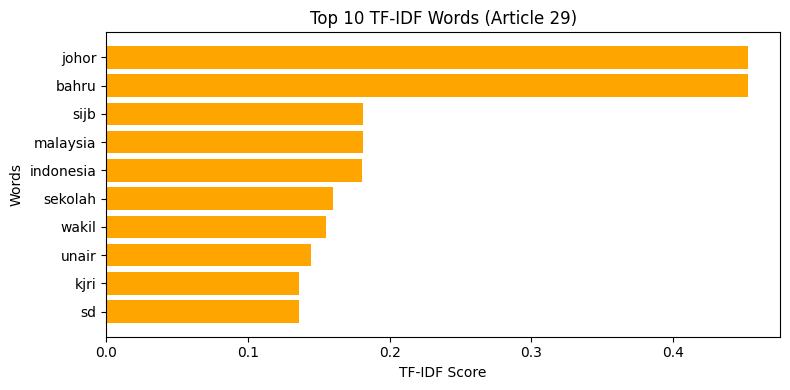

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature names (words) from the tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame from the tfidf_matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df.index)

# For each row (article) in the TF-IDF DataFrame:
print("Top 10 TF-IDF words for each article:")
for index, row in tfidf_df.iterrows():
    # Sort the TF-IDF values in descending order and select top 10
    top_words = row.sort_values(ascending=False).head(10)

    # Print the article index and the top 10 words with their scores
    print(f"\nArticle {index}:")
    for word, score in top_words.items():
        print(f"  {word}: {score:.4f}")

    # Plot top 10 TF-IDF words
    plt.figure(figsize=(8, 4))
    plt.barh(top_words.index[::-1], top_words.values[::-1], color="orange")
    plt.title(f"Top 10 TF-IDF Words (Article {index})")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


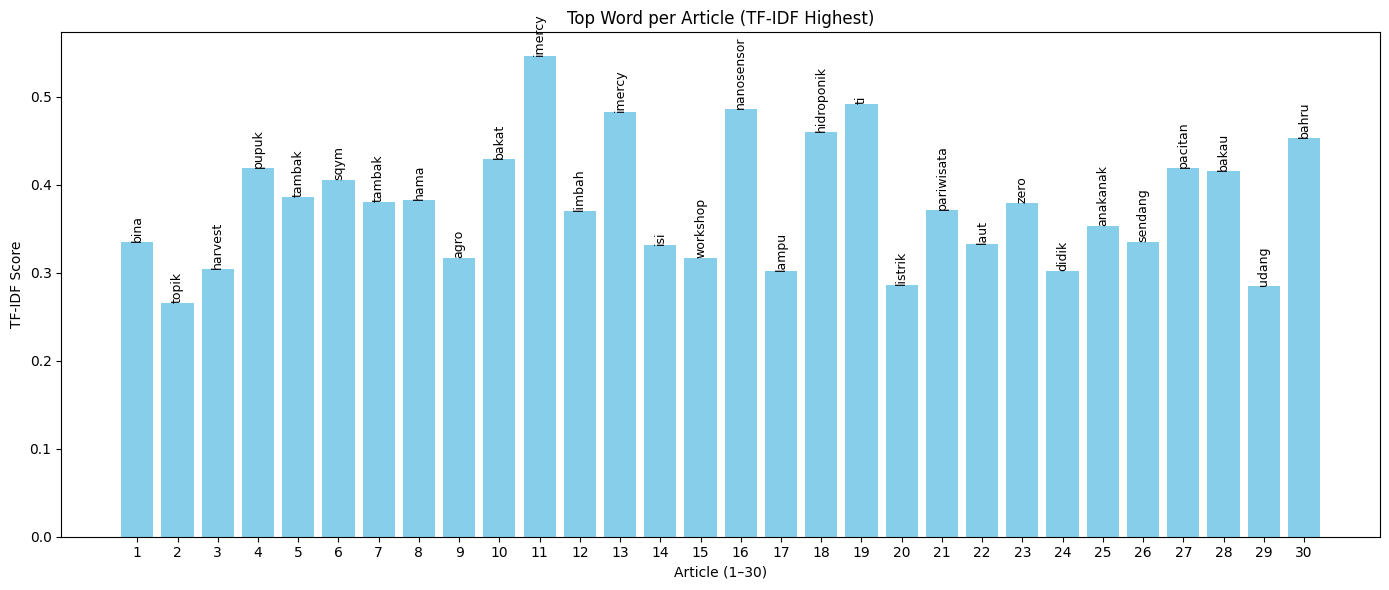

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature names (words) dari tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Buat DataFrame dari tfidf_matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df.index)

# Cari kata terpenting (skor TF-IDF tertinggi) di tiap artikel
top_words_per_doc = []
for idx, row in tfidf_df.iterrows():
    top_word = row.idxmax()   # kata dengan skor tertinggi
    top_score = row.max()     # nilai TF-IDF tertinggi
    top_words_per_doc.append((idx + 1, top_word, top_score))  # pakai idx+1 biar 1–30

# Konversi ke DataFrame
top_words_df = pd.DataFrame(top_words_per_doc, columns=["article", "word", "tfidf"])

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(top_words_df["article"], top_words_df["tfidf"], color="skyblue")

# Tambahkan label kata di atas bar
for bar, word in zip(bars, top_words_df["word"]):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             word,
             ha="center", va="bottom", fontsize=9, rotation=90)

plt.title("Top Word per Article (TF-IDF Highest)")
plt.xlabel("Article (1–30)")
plt.ylabel("TF-IDF Score")
plt.xticks(range(1, len(top_words_df["article"]) + 1))
plt.tight_layout()
plt.show()


## Pos tagging and ner

### Subtask:
Lakukan POS Tagging dan NER pada salah satu artikel.


In [98]:
!pip install stanza

In [99]:
import stanza
stanza.download('id')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...
INFO:stanza:File exists: /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [100]:
nlp = stanza.Pipeline(lang='id', processors='tokenize, pos, lemma')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| pos       | gsd_charlm   |
| lemma     | gsd_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [101]:
# Select the text from the first row of the 'cleaned_description' column
article_text = df['cleaned_description'].iloc[0]

# Process the text with the nlp pipeline
doc = nlp(article_text)

# Print the results for POS tagging and lemma
print("POS Tagging and Lemma for the first article:")
for sentence in doc.sentences:
    print("\nSentence:")
    for word in sentence.words:
        # Stanza's word object contains lemma and pos information
        print(f"{word.text},{word.pos}")

POS Tagging and Lemma for the first article:

Sentence:
badan,NOUN
eksekutif,ADJ
mahasiswa,NOUN
fakultas,NOUN
teknologi,NOUN
maju,VERB
dan,CCONJ
multidisiplin,NOUN
universitas,PROPN
airlangga,NOUN
melaksanakan,VERB
program,NOUN
desa,NOUN
binaan,NOUN
sebagai,ADP
wujud,NOUN
nyata,NOUN
pengabdian,NOUN
masyarakat,NOUN
program,NOUN
tahunan,NOUN
bem,NOUN
ftmm,NOUN
ini,DET
berfokus,VERB
pada,ADP
pemberdayaan,NOUN
masyarakat,NOUN
desa,NOUN
dan,CCONJ
tahun,NOUN
ini,DET
berkolaborasi,VERB
dengan,ADP
komunitas,NOUN
argon,NOUN
kegiatan,NOUN
ini,DET
bertujuan,VERB
untuk,SCONJ
menghadirkan,VERB
solusi,NOUN
berkelanjutan,VERB
melalui,ADP
pendekatan,NOUN
teknologi,NOUN
inovasi,NOUN
dan,CCONJ
peningkatan,NOUN
kemandirian,NOUN
desa,NOUN
dengan,ADP
strategi,NOUN
tersebut,DET
desa,NOUN
binaan,NOUN
berupaya,VERB
menjadi,VERB
inspirasi,NOUN
bagi,ADP
pengembangan,NOUN
program,NOUN
serupa,ADJ
di,ADP
wilayah,NOUN
lainpada,NOUN
minggu,NOUN
pertama,ADJ
kegiatan,NOUN
ini,DET
berlangsung,VERB
pada,ADP
hari,NOUN
ju

In [102]:
manual_df = pd.read_csv("/content/POS_manual_article.csv")
manual_df.head()

Token POS_manual
0      badan       Noun
1  eksekutif       Noun
2  mahasiswa       Noun
3   fakultas       Noun
4  teknologi       Noun

In [103]:
# Misalnya dataframe bernama df
manual_df['POS_manual'] = manual_df['POS_manual'].str.upper()

In [104]:
manual_df.head()

Token POS_manual
0      badan       NOUN
1  eksekutif       NOUN
2  mahasiswa       NOUN
3   fakultas       NOUN
4  teknologi       NOUN

In [105]:
import pandas as pd

# Ambil teks dari kolom cleaned_description
article_text = df['cleaned_description'].iloc[0]

# Proses dengan NLP Stanza
doc = nlp(article_text)

# Simpan hasil POS tagging dari stanza
stanza_tokens = []
for sentence in doc.sentences:
    for word in sentence.words:
        stanza_tokens.append((word.text, word.pos))

# Buat dataframe dari hasil stanza
stanza_df = pd.DataFrame(stanza_tokens, columns=['token', 'POS_stanza'])

# Pastikan POS_manual di kapital semua
manual_df['POS_manual'] = manual_df['POS_manual'].astype(str).str.upper()

# Rename 'Token' column in manual_df to 'token'
manual_df = manual_df.rename(columns={'Token': 'token'})


# Gabungkan manual_df dengan stanza_df berdasarkan token
merged_df = pd.merge(manual_df, stanza_df, on='token', how='outer')

# Simpan ke CSV kalau mau
merged_df.to_csv("pos_comparison.csv", index=False)

print(merged_df.head())

    token POS_manual POS_stanza
0   acara       NOUN       NOUN
1   acara       NOUN       NOUN
2   acara       NOUN       NOUN
3   acara       NOUN       NOUN
4  adalah       VERB        AUX


In [106]:
article_text

'badan eksekutif mahasiswa fakultas teknologi maju dan multidisiplin universitas airlangga melaksanakan program desa binaan  sebagai wujud nyata pengabdian masyarakat program tahunan bem ftmm ini berfokus pada pemberdayaan masyarakat desa dan tahun ini berkolaborasi dengan komunitas argon kegiatan ini bertujuan untuk menghadirkan solusi berkelanjutan melalui pendekatan teknologi inovasi dan peningkatan kemandirian desa dengan strategi tersebut desa binaan  berupaya menjadi inspirasi bagi pengembangan program serupa di wilayah lainpada minggu pertama kegiatan ini berlangsung pada hari jumat hingga minggu  september  di desa ngerong kabupaten pasuruan rombongan volunteer berangkat menuju lokasi pada jumat sore kemudian melanjutkan sesi briefing internal untuk mempersiapkan kegiatan esok hari pembukaan resmi berlangsung pada sabtu  september  di balai dusun karangploso kecamatan gempol acara berawal dari sambutan ketua pelaksana kemudian berlanjut dengan presiden bem ftmm dosen pembimbing

In [107]:
!pip install -q transformers datasets spacy torch

<h1>NER</H1>

In [108]:
# Install libraries

# Download IndoBERT NER model dan tokenizer
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Model IndoBERT untuk NER (fine-tuned)
model_checkpoint = "indobenchmark/indobert-base-p1"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForTokenClassification.from_pretrained("cahya/bert-base-indonesian-NER")

# Buat pipeline NER
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Jalankan NER
entities = nlp_ner(article_text)

# Tampilkan hasil
for ent in entities:
    print(f"{ent['word']} ({ent['entity_group']}) : {ent['score']:.2f}")


Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


mahasiswa fakultas teknologi maju (PRD) : 0.39
##iplin universitas airlangga (PRD) : 0.51
program desa binaan (PRD) : 0.27
masyarakat program tahunan bem ft (ORG) : 0.36
ini (PRD) : 0.41
pada (ORG) : 0.26
pemberdayaan masyarakat desa dan tahun ini berkolaborasi dengan (PRD) : 0.45
argo (CRD) : 0.32
##n (PRD) : 0.21
kegiatan (ORG) : 0.32
ini (PRD) : 0.53
untuk (PER) : 0.43
melalui (ORG) : 0.30
pendekatan (PRD) : 0.35
teknologi (ORG) : 0.45
dan peningkatan kemandirian desa dengan (PRD) : 0.47
strategi tersebut desa (PRD) : 0.30
binaan (ORG) : 0.26
bagi (ORG) : 0.12
pengembangan (PRD) : 0.31
program (ORG) : 0.24
di (CRD) : 0.58
wilayah (QTY) : 0.32
lain (ORG) : 0.14
minggu pertama kegiatan (ORG) : 0.28
ini berlangsung pada hari jumat hingga (PRD) : 0.40
di (CRD) : 0.58
desa (QTY) : 0.31
##ong kabupaten pasuruan rombongan (PRD) : 0.36
menuju (CRD) : 0.25
lokasi (QTY) : 0.33
pada (PRD) : 0.35
internal untuk (PRD) : 0.32
pembukaan resmi berlangsung pada (PRD) : 0.41
di (CRD) : 0.75
dusun (DA

Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


=== HASIL NER ===
mahasiswa fakultas teknologi maju (PRD) : 0.3890
##iplin universitas airlangga (PRD) : 0.5127
program desa binaan (PRD) : 0.2717
masyarakat program tahunan bem ft (ORG) : 0.3600
ini (PRD) : 0.4100
pada (ORG) : 0.2639
pemberdayaan masyarakat desa dan tahun ini berkolaborasi dengan (PRD) : 0.4456
argo (CRD) : 0.3187
##n (PRD) : 0.2126
kegiatan (ORG) : 0.3234
ini (PRD) : 0.5289
untuk (PER) : 0.4314
melalui (ORG) : 0.3009
pendekatan (PRD) : 0.3508
teknologi (ORG) : 0.4507
dan peningkatan kemandirian desa dengan (PRD) : 0.4740
strategi tersebut desa (PRD) : 0.2975
binaan (ORG) : 0.2600
bagi (ORG) : 0.1182
pengembangan (PRD) : 0.3061
program (ORG) : 0.2406
di (CRD) : 0.5789
wilayah (QTY) : 0.3194
lain (ORG) : 0.1371
minggu pertama kegiatan (ORG) : 0.2809
ini berlangsung pada hari jumat hingga (PRD) : 0.4020
di (CRD) : 0.5792
desa (QTY) : 0.3115
##ong kabupaten pasuruan rombongan (PRD) : 0.3629
menuju (CRD) : 0.2518
lokasi (QTY) : 0.3342
pada (PRD) : 0.3497
internal untuk (P

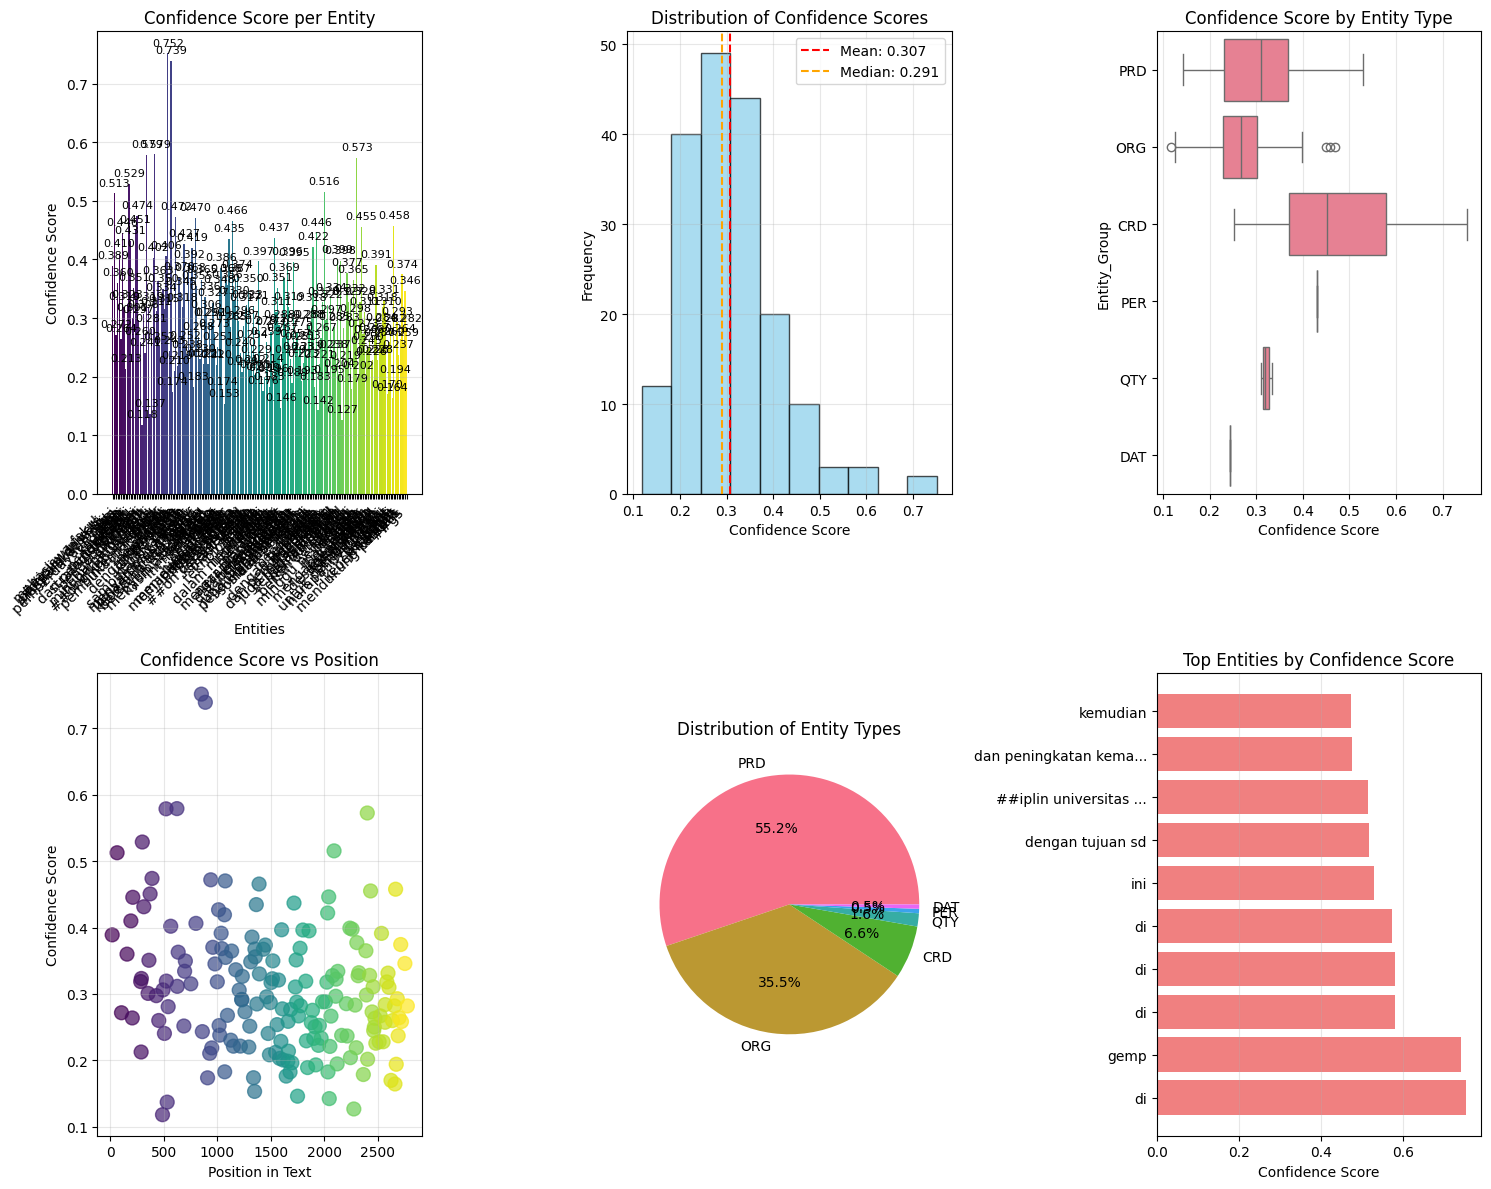


=== STATISTIK CONFIDENCE SCORES ===
Total entities: 183
Mean confidence: 0.3069
Median confidence: 0.2912
Standard deviation: 0.1018
Min confidence: 0.1182
Max confidence: 0.7516

=== ENTITIES DENGAN CONFIDENCE RENDAH (< 0.5) ===
mahasiswa fakultas teknologi maju (PRD) : 0.3890
program desa binaan (PRD) : 0.2717
masyarakat program tahunan bem ft (ORG) : 0.3600
ini (PRD) : 0.4100
pada (ORG) : 0.2639
pemberdayaan masyarakat desa dan tahun ini berkolaborasi dengan (PRD) : 0.4456
argo (CRD) : 0.3187
##n (PRD) : 0.2126
kegiatan (ORG) : 0.3234
untuk (PER) : 0.4314
melalui (ORG) : 0.3009
pendekatan (PRD) : 0.3508
teknologi (ORG) : 0.4507
dan peningkatan kemandirian desa dengan (PRD) : 0.4740
strategi tersebut desa (PRD) : 0.2975
binaan (ORG) : 0.2600
bagi (ORG) : 0.1182
pengembangan (PRD) : 0.3061
program (ORG) : 0.2406
wilayah (QTY) : 0.3194
lain (ORG) : 0.1371
minggu pertama kegiatan (ORG) : 0.2809
ini berlangsung pada hari jumat hingga (PRD) : 0.4020
desa (QTY) : 0.3115
##ong kabupaten pa

In [109]:
# Install libraries (jalankan di terminal jika belum terinstall)
# pip install transformers torch matplotlib seaborn pandas

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Download IndoBERT NER model dan tokenizer
model_checkpoint = "indobenchmark/indobert-base-p1"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForTokenClassification.from_pretrained("cahya/bert-base-indonesian-NER")

# Buat pipeline NER
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Jalankan NER
entities = nlp_ner(article_text)

# Tampilkan hasil
print("=== HASIL NER ===")
for ent in entities:
    print(f"{ent['word']} ({ent['entity_group']}) : {ent['score']:.4f}")

# Konversi ke DataFrame untuk plotting
if entities:
    df = pd.DataFrame(entities)

    # Set style untuk plot
    plt.style.use('default')
    sns.set_palette("husl")

    # Create figure dengan multiple subplots
    fig = plt.figure(figsize=(15, 12))

    # 1. Bar plot confidence score untuk setiap entity
    plt.subplot(2, 3, 1)
    entity_names = [ent['word'][:15] + '...' if len(ent['word']) > 15 else ent['word'] for ent in entities]
    scores = [ent['score'] for ent in entities]
    colors = plt.cm.viridis(np.linspace(0, 1, len(entities)))

    bars = plt.bar(range(len(entities)), scores, color=colors)
    plt.xlabel('Entities')
    plt.ylabel('Confidence Score')
    plt.title('Confidence Score per Entity')
    plt.xticks(range(len(entities)), entity_names, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Tambahkan nilai di atas bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    # 2. Histogram distribusi confidence score
    plt.subplot(2, 3, 2)
    plt.hist(scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(scores), color='red', linestyle='--',
                label=f'Mean: {np.mean(scores):.3f}')
    plt.axvline(np.median(scores), color='orange', linestyle='--',
                label=f'Median: {np.median(scores):.3f}')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Confidence Scores')
    plt.legend()
    plt.grid(alpha=0.3)

    # 3. Box plot berdasarkan entity group
    plt.subplot(2, 3, 3)
    entity_groups = [ent['entity_group'] for ent in entities]
    df_plot = pd.DataFrame({'Entity_Group': entity_groups, 'Score': scores})

    sns.boxplot(data=df_plot, y='Entity_Group', x='Score')
    plt.title('Confidence Score by Entity Type')
    plt.xlabel('Confidence Score')
    plt.grid(axis='x', alpha=0.3)

    # 4. Scatter plot: posisi vs confidence
    plt.subplot(2, 3, 4)
    positions = [ent['start'] for ent in entities]
    plt.scatter(positions, scores, c=colors, s=100, alpha=0.7)
    plt.xlabel('Position in Text')
    plt.ylabel('Confidence Score')
    plt.title('Confidence Score vs Position')
    plt.grid(alpha=0.3)

    # 5. Pie chart untuk entity types
    plt.subplot(2, 3, 5)
    entity_counts = pd.Series(entity_groups).value_counts()
    plt.pie(entity_counts.values, labels=entity_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Entity Types')

    # 6. Horizontal bar untuk top entities berdasarkan confidence
    plt.subplot(2, 3, 6)
    # Sort entities by score
    sorted_entities = sorted(entities, key=lambda x: x['score'], reverse=True)
    top_entities = sorted_entities[:10]  # Top 10

    top_names = [ent['word'][:20] + '...' if len(ent['word']) > 20 else ent['word'] for ent in top_entities]
    top_scores = [ent['score'] for ent in top_entities]

    plt.barh(range(len(top_entities)), top_scores, color='lightcoral')
    plt.yticks(range(len(top_entities)), top_names)
    plt.xlabel('Confidence Score')
    plt.title('Top Entities by Confidence Score')
    plt.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Statistik deskriptif
    print("\n=== STATISTIK CONFIDENCE SCORES ===")
    print(f"Total entities: {len(entities)}")
    print(f"Mean confidence: {np.mean(scores):.4f}")
    print(f"Median confidence: {np.median(scores):.4f}")
    print(f"Standard deviation: {np.std(scores):.4f}")
    print(f"Min confidence: {np.min(scores):.4f}")
    print(f"Max confidence: {np.max(scores):.4f}")

    # Entities dengan confidence rendah (< 0.5)
    low_confidence = [ent for ent in entities if ent['score'] < 0.5]
    if low_confidence:
        print(f"\n=== ENTITIES DENGAN CONFIDENCE RENDAH (< 0.5) ===")
        for ent in low_confidence:
            print(f"{ent['word']} ({ent['entity_group']}) : {ent['score']:.4f}")

    # Entities dengan confidence tinggi (> 0.9)
    high_confidence = [ent for ent in entities if ent['score'] > 0.9]
    if high_confidence:
        print(f"\n=== ENTITIES DENGAN CONFIDENCE TINGGI (> 0.9) ===")
        for ent in high_confidence:
            print(f"{ent['word']} ({ent['entity_group']}) : {ent['score']:.4f}")

else:
    print("Tidak ada entity yang terdeteksi dalam teks.")

# Fungsi tambahan untuk analisis lebih detail
def analyze_confidence_by_entity_type(entities):
    """Analisis confidence score berdasarkan jenis entity"""
    df = pd.DataFrame(entities)
    if not df.empty:
        analysis = df.groupby('entity_group')['score'].agg([
            'count', 'mean', 'std', 'min', 'max'
        ]).round(4)
        print("\n=== ANALISIS PER JENIS ENTITY ===")
        print(analysis)
        return analysis
    return None

# Jalankan analisis tambahan
if entities:
    analyze_confidence_by_entity_type(entities)

## Predict next words

### Subtask:
Prediksi 5 kata yang paling mungkin muncul setelah input satu kata tertentu menggunakan model N-gram.

In [81]:
from collections import Counter
import itertools
import nltk

# Flatten the list of lists of tokens into a single list
all_tokens = list(itertools.chain.from_iterable(df['processed_description']))

# Generate bigrams (pairs of consecutive words)
bigrams = list(nltk.bigrams(all_tokens))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Generate trigrams (triplets of consecutive words)
trigrams = list(nltk.trigrams(all_tokens))

# Count the frequency of each trigram
trigram_counts = Counter(trigrams)

print("Bigram counts generated.")
print("Trigram counts generated.")

Bigram counts generated.
Trigram counts generated.


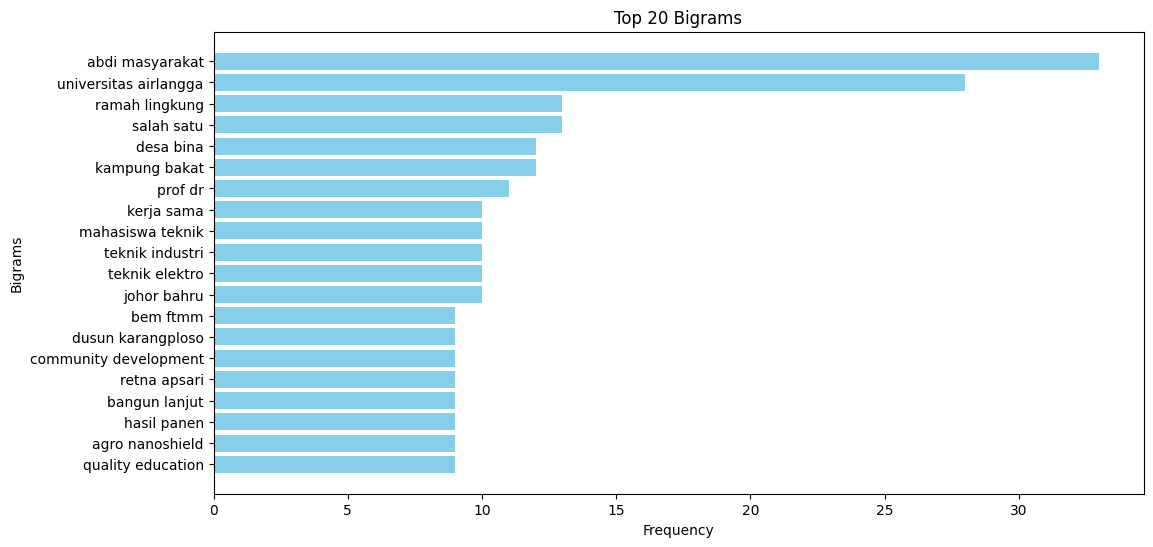

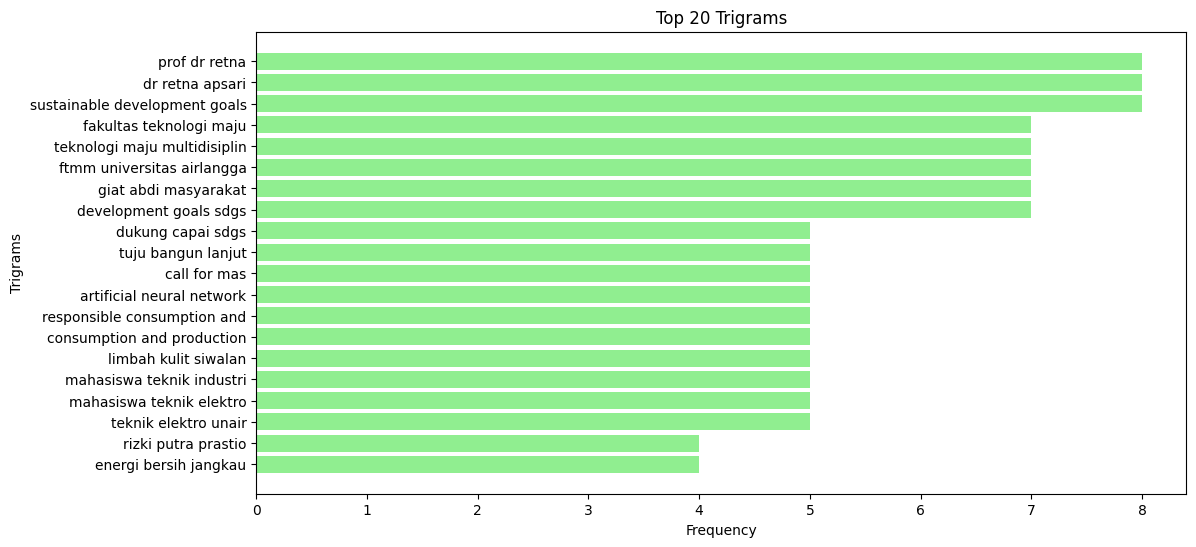

In [82]:
import matplotlib.pyplot as plt

# Tentukan jumlah bigram/trigram teratas yang ingin ditampilkan
top_n = 20

# Ambil bigram teratas
bigram_top = bigram_counts.most_common(top_n)
bigram_words = [' '.join(b) for b, _ in bigram_top]
bigram_freqs = [c for _, c in bigram_top]

# Ambil trigram teratas
trigram_top = trigram_counts.most_common(top_n)
trigram_words = [' '.join(t) for t, _ in trigram_top]
trigram_freqs = [c for _, c in trigram_top]

# Plot Bigram
plt.figure(figsize=(12, 6))
plt.barh(bigram_words[::-1], bigram_freqs[::-1], color="skyblue")
plt.title(f"Top {top_n} Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

# Plot Trigram
plt.figure(figsize=(12, 6))
plt.barh(trigram_words[::-1], trigram_freqs[::-1], color="lightgreen")
plt.title(f"Top {top_n} Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.show()


In [83]:
from collections import defaultdict

def predict_next_words(input_word, n_gram_counts, n=5):
    """
    Predicts the top N most likely next words based on n-gram counts.

    Args:
        input_word (str): The word to predict the next words for.
        n_gram_counts (Counter): A Counter object containing n-gram frequencies.
        n (int): The number of top words to predict.

    Returns:
        list: A list of tuples containing the predicted word and its frequency.
    """
    # Filter n-grams that start with the input word
    relevant_ngrams = [(ngram, count) for ngram, count in n_gram_counts.items() if ngram[0] == input_word]

    # Sort by frequency in descending order and take the top N
    predicted_words = sorted(relevant_ngrams, key=lambda item: item[1], reverse=True)[:n]

    # Extract just the next word and its frequency
    return [(ngram[1], count) for ngram, count in predicted_words]

In [84]:
# Example usage: Predict the next 5 words after the word 'pengabdian' using bigram counts
input_word = 'giat'
predicted_words_bigram = predict_next_words(input_word, bigram_counts)

print(f"Predicted next 5 words after '{input_word}' using bigram model:")
print(predicted_words_bigram)

# You can similarly use trigram_counts if you modify the predict_next_words function
# to handle trigrams or create a new function for trigram prediction.

Predicted next 5 words after 'giat' using bigram model:
[('abdi', 8), ('mas', 5), ('langsung', 3), ('rupa', 3), ('desa', 2)]


## Summary:

### Data Analysis Key Findings

* The dataset contains 30 articles with 'title' and 'description' fields.
* Text cleaning successfully removed HTML tags, URLs, numbers, and symbols, and converted text to lowercase.
* Text preprocessing involved tokenization, stopword removal (using Indonesian stopwords), and stemming (using Porter Stemmer), resulting in a processed list of tokens for each description.
* A TF-IDF matrix was generated, representing the articles as vectors. The matrix has a shape of (30, 1766), indicating 30 documents and 1766 unique words (features) after preprocessing.
* The top 10 TF-IDF words were successfully identified and displayed for each article, highlighting the most distinctive terms in each document.
* Attempts to perform POS tagging and NER using Stanza showed that while POS tagging and lemma extraction were successful, the NER model for Indonesian was not available, leading to an error.
* A bigram model was successfully built by flattening all processed tokens and counting the frequency of consecutive word pairs.
* The function `predict_next_words` was successfully implemented and demonstrated the ability to predict the most likely next words based on bigram frequencies for a given input word.

### Insights or Next Steps

* The limitation in performing NER highlights a potential area for further exploration: finding alternative Indonesian NLP libraries with robust NER capabilities or exploring the possibility of training a custom NER model.
* The bigram model provides a basic understanding of word sequences. For more advanced language modeling, building trigram or higher-order N-gram models, or utilizing deep learning models like LSTMs or Transformers, could be considered.
* The TF-IDF representation can be used for various downstream tasks such as document similarity analysis, clustering, or text classification.
* The insights gained from the top TF-IDF words can help understand the main themes and topics present in each article.